<a href="https://colab.research.google.com/github/Kancherla-Amulya/AIML-2303A51242/blob/main/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

#2 - Loading the data

In [2]:
car_data = fetch_openml(name='car', version=2, parser='auto')

In [3]:
type("car_data")

str

In [4]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [7]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


##Exploratory Analysis

Splitting Data into Training and Test sets

<Axes: xlabel='BinaryClass', ylabel='count'>

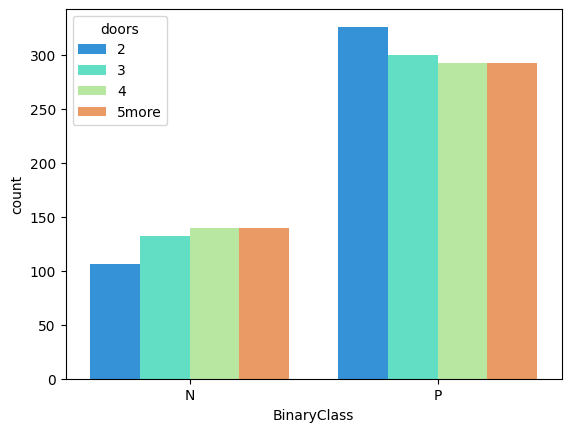

In [8]:
!pip install seaborn
import seaborn as sns # Make sure you import seaborn
import pandas as pd
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

df = pd.DataFrame(car_data['data'], columns=car_data['feature_names'])
df['BinaryClass'] = car_data.target

sns.countplot(x='BinaryClass', hue='doors', data=df, palette='rainbow') # Use 'BinaryClass' and the dataframe


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the car dataset
car_data = fetch_openml(name='car', version=2, parser='auto')

# Create a pandas DataFrame from the data
df = pd.DataFrame(car_data['data'], columns=car_data['feature_names'])
df['BinaryClass'] = car_data.target

# Now use the DataFrame in train_test_split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=20)

print('the Size of training data is :{}\n The size of testing data is : {}'.format(len(train_data), len(test_data)))

the Size of training data is :1209
 The size of testing data is : 519


In [12]:
train_data.describe()


,buying,maint,doors,persons,lug_boot,safety,BinaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


#Checking missing values

In [13]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
BinaryClass,0


In [14]:
train_data['buying'].value_counts()


,count
buying,
med,327
high,307
vhigh,291
low,284


In [15]:
train_data['maint'].value_counts()


,count
maint,
high,311
med,311
vhigh,294
low,293


In [16]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [17]:
train_data['persons'].value_counts()


,count
persons,
more,418
2,407
4,384


In [18]:
train_data['lug_boot'].value_counts()


,count
lug_boot,
big,411
med,405
small,393


In [19]:
train_data['safety'].value_counts()


,count
safety,
med,406
low,402
high,401


In [36]:
train_data['BinaryClass'].value_counts()

,count
BinaryClass,
P,849
N,360


<Axes: xlabel='buying', ylabel='count'>

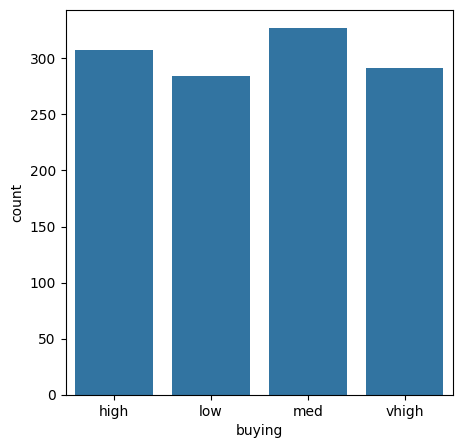

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="buying")

<Axes: xlabel='maint', ylabel='count'>

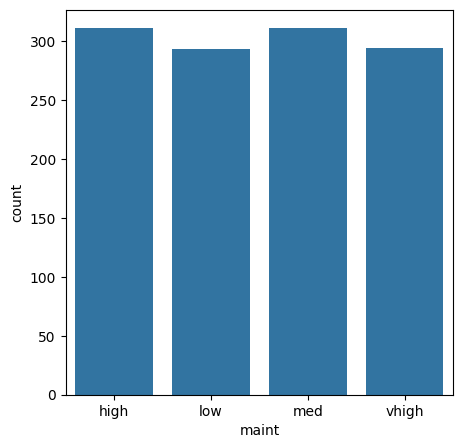

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="maint")

<Axes: xlabel='doors', ylabel='count'>

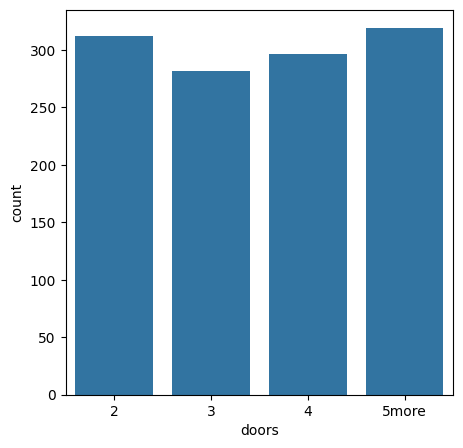

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="doors")


<Axes: xlabel='persons', ylabel='count'>

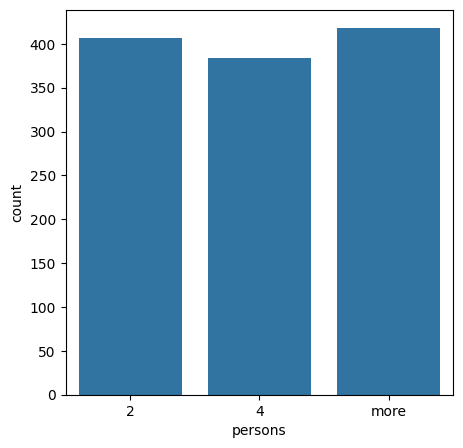

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="persons")


<Axes: xlabel='lug_boot', ylabel='count'>

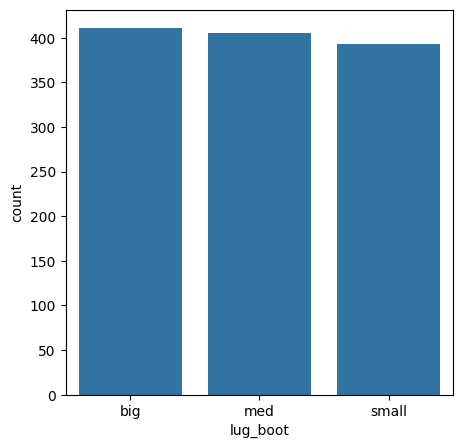

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="lug_boot")


<Axes: xlabel='safety', ylabel='count'>

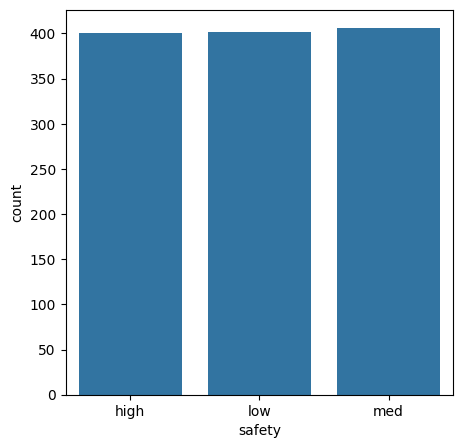

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="safety")


<Axes: xlabel='buying', ylabel='count'>

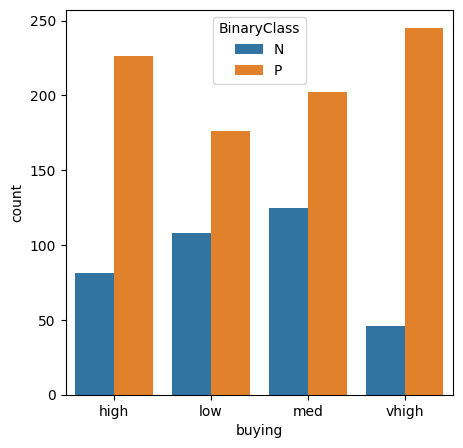

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='buying',hue='BinaryClass')

<Axes: xlabel='maint', ylabel='count'>

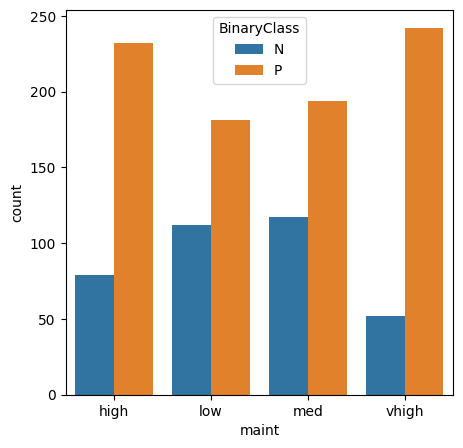

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='maint',hue='BinaryClass')


<Axes: xlabel='doors', ylabel='count'>

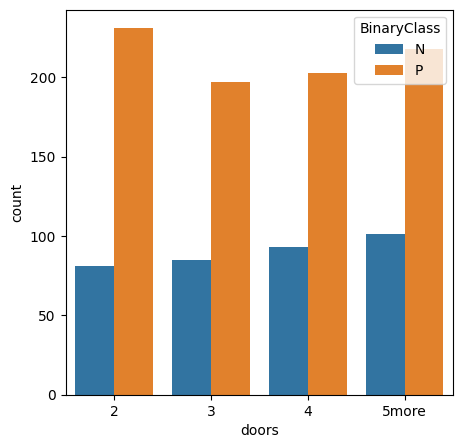

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='doors',hue='BinaryClass')


<Axes: xlabel='persons', ylabel='count'>

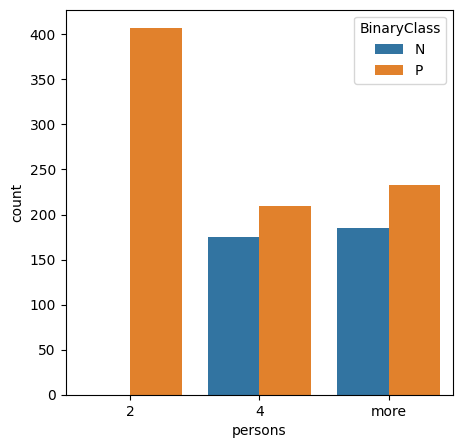

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='persons',hue='BinaryClass')


<Axes: xlabel='lug_boot', ylabel='count'>

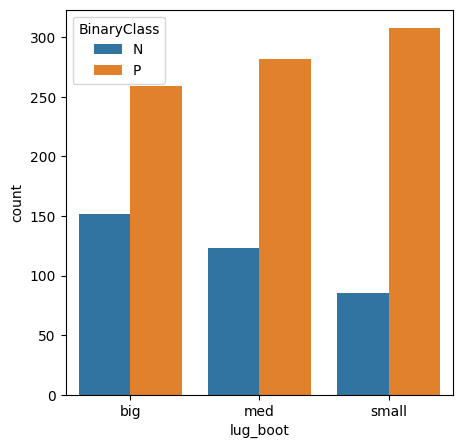

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='lug_boot',hue='BinaryClass')


<Axes: xlabel='safety', ylabel='count'>

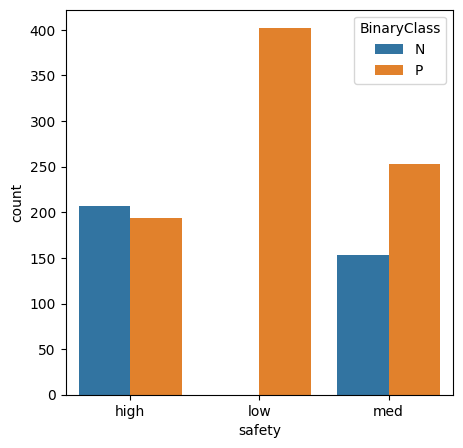

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='safety',hue='BinaryClass')


<Axes: xlabel='BinaryClass', ylabel='count'>

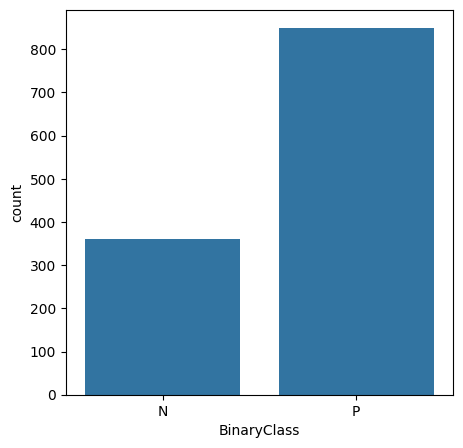

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x='BinaryClass')

#Data Preprocessing
#Handling Ctegorical features

In [54]:
ct=train_data.drop('BinaryClass',axis=1)
cl=train_data[['BinaryClass']]


In [55]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
p=Pipeline([('ord_enc',OrdinalEncoder())])
ct_prepared=p.fit_transform(ct)


In [56]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
cl_prepared=label_enc.fit_transform(cl)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Training Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier()
tc.fit(ct_prepared,cl_prepared)


DecisionTreeClassifier()

|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

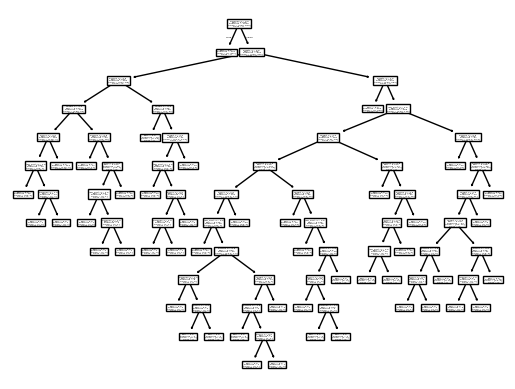

In [58]:
from sklearn.tree import export_text, plot_tree
tc=DecisionTreeClassifier()
tc.fit(ct_prepared,cl_prepared)
text_representation=export_text(tc,feature_names=list(ct.columns))
print(text_representation)
plot_tree(tc,feature_names=ct.columns,class_names=['N','P']);


##Evaluating Decision Trees

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred =tc.predict(ct_prepared)
cm = confusion_matrix(cl_prepared,pred)
acc= accuracy_score(cl_prepared,pred)
print(cm)
print(acc)

report = classification_report(cl_prepared,pred)
print(report)

[[360   0]
 [  0 849]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

